# Lexical Category Analysis with Empath
A way to analyze any DTRS dataset using custom lexical categories created with Empath.

In [1]:
import sys
import re
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from empath import Empath
from IPython.display import Markdown, display

In [2]:
def printmd(string):
    display(Markdown(string))

## Load DTRS datasets
Load pre-processed DTRS datasets into a dataframe

In [3]:
files = glob.glob('./output/*.txt')

df_list = []

for filename in files:
    df_file = pd.read_csv(filename, sep=';')
    df_list.append(df_file)

df = pd.concat(df_list, axis=0, ignore_index=True)
print("Read", len(files), "files and loaded", df.shape[0], "rows into the dataframe.")

Read 65 files and loaded 20902 rows into the dataframe.


In [4]:
df[0:10]

,dataset,session,speaker,utterance
0,dtrs-10,grad-2-concept-review-sharon,Steve,Next. Okay whose turn? Wilson?
1,dtrs-10,grad-2-concept-review-sharon,Wilson,Huh?
2,dtrs-10,grad-2-concept-review-sharon,Steve,"You’re talking, it’s your turn."
3,dtrs-10,grad-2-concept-review-sharon,Wilson,It’s my turn?
4,dtrs-10,grad-2-concept-review-sharon,Steve,You critique it. What’s working. Explain the...
5,dtrs-10,grad-2-concept-review-sharon,Wilson,Let me take a look. Uh. So it is uh a coat h...
6,dtrs-10,grad-2-concept-review-sharon,Steve,"OK. It makes sense. Okay, what is good about..."
7,dtrs-10,grad-2-concept-review-sharon,Wilson,I think the storyboard it make very good sense.
8,dtrs-10,grad-2-concept-review-sharon,Steve,Okay.
9,dtrs-10,grad-2-concept-review-sharon,Wilson,Yes.


## Create Custom Lexicons
Empath has three models from which to create lexical categories, one trained on a Reddit dataset, one on New York Times, and one on an open corpus of fiction. We create lexical categories from all three models and then use the one best applicable to our dataest.

In [5]:
lexicon = Empath()
movement_seed_words = ['walk', 'move', 'fly', 'roll', 'skate', 'crawl', 'swim', 'drive', 'bike', 'sail']
lexicon.create_category('movement-reddit', movement_seed_words, model="reddit", size=100)
movement_reddit = list(set(lexicon.cats['movement-reddit']))
printmd_string = "Created category with **" + str(len(movement_reddit)) + " terms** using the Reddit dataset."
printmd(printmd_string)
print("---------------------------------------------------------------------")
lexicon.create_category('movement-nytimes', movement_seed_words, model="nytimes", size=100)
movement_ny = list(set(lexicon.cats['movement-nytimes']));
printmd_string = "Created category with **" + str(len(movement_ny)) + " terms** using the New York Times dataset."
printmd(printmd_string)
print("---------------------------------------------------------------------")
lexicon.create_category('movement-fiction', movement_seed_words, model="fiction", size=100)
movement_fiction = list(set(lexicon.cats['movement-fiction']))
printmd_string = "Created category with **" + str(len(movement_fiction)) + " terms** using the Fiction dataset."
printmd(printmd_string)

["if", "maybe", "might", "perhaps", "possibly", "probably"]

lexicon.create_category('possibility', ["if", "maybe", "might", "perhaps", "possibly", "probably"], model="fiction", size=50)
possibility = list(set(lexicon.cats['movement-fiction']))
printmd_string = "Created category with **" + str(len(possibility)) + " terms** using the Fiction dataset."
printmd(printmd_string)

["swim", "walk", "paddle", "ride", "crawl", "scoot", "paddling", "drag", "swim", "waddle", "gallop", "jump", "Swim", "feet", "fly", "pedal", "trail", "skate", "slip", "haul", "slide", "jog", "jog", "crawl", "climb_trees", "chase", "walk", "faceplant", "boat", "catch", "knuckle", "riding", "hike", "fling", "uphill", "snowboard", "swimming", "long_board", "float", "hop", "sprint", "raft", "bonk", "hike", "walk/run", "dismount", "mosey", "limp", "train", "scurry", "whack", "ditch", "skateboard", "duck", "kayak", "huck", "ski", "saunter", "wheel", "dart", "paddling", "sideways", "sail", "plow", "yank", "fly", "loaf", "dive", "head", "drive", "legs", "kayak", "town", "lumber", "lay", "step", "skateboard", "hump", "sit", "climb", "shimmy", "pound", "scoot", "trail", "zip", "soft_sand", "long_ride", "feet", "glide", "trudge", "deep_water", "skid", "strap", "beach", "putter", "maneuver"]


Created category with **84 terms** using the Reddit dataset.

---------------------------------------------------------------------
["hop", "ride", "walk", "dive", "swim", "crawl", "pedal", "sail", "race", "drive", "ski", "fly", "jump", "row", "zip", "paddle", "jog", "cruise", "climb", "glide", "hike", "go", "sprint", "circle", "bump", "move", "wander", "skate", "park", "plow", "paddling", "crash", "hurry", "travel", "chase", "sneak", "tow", "dash", "haul", "drift", "fish", "hustle", "pull", "leap", "land", "scoot", "slip", "dart", "lug", "board", "wade", "hoist", "bounce", "strap", "slide", "clamber", "gallop", "blast", "stretch", "paddled", "roll", "descend", "skis", "venture", "stagger", "stroll", "rush", "swing", "dribble", "hook", "splash", "limp", "maneuver", "tuck", "swoop", "wheel", "pack", "buckle", "trudge", "paddle", "stow", "trip", "bike", "kick", "bike", "get", "hug", "drag", "roar", "stay", "zoom", "float", "shoot", "amble", "catch", "jam", "wiggle", "sink", "suck", "sit"]


Created category with **98 terms** using the New York Times dataset.

---------------------------------------------------------------------
["move", "fly", "walk", "climb", "drive", "swim", "pull", "drag", "paddle", "crawl", "back", "skate", "ride", "push", "reach", "swing", "jump", "jog", "race", "step", "sprint", "rush", "stand", "pass", "hop", "turn", "dive", "climb", "drop", "roll", "slide", "slip", "fall", "head", "speed", "float", "throw", "crash", "stretch", "kick", "travel", "sail", "moving", "land", "paddling", "zoom", "carry", "haul", "hike", "bounce", "sweep", "chase", "trot", "run", "dash", "limp", "gallop", "lift", "scramble", "close", "crawl", "walking", "duck", "skating", "stumble", "start", "sit", "dive", "tumble", "train_tracks", "wind", "bring", "scamper", "bend", "march", "freeze", "near", "leave", "stroll", "park", "wander", "scurry", "bike", "wade", "leap", "shoot", "shift", "running", "flip", "hold"]


Created category with **87 terms** using the Fiction dataset.

["might", "If", "should", "probably", "maybe", "Maybe", "Or", "anyway", "suppose", "though", "actually", "either", "possibly", "'d", "Because", "otherwise", "surely", "unless", "Unless", "wanted", "personally", "thought", "must"]


Created category with **87 terms** using the Fiction dataset.

In [6]:
def add_empath_measure(df, lex_category, normalize_measure=False):
    if lex_category in df.columns :
        print("Column already exists for", lex_category, ". Repopulating...")
        df = df.drop(lex_category, axis=1)
    column_index = len(df.columns)
    empath_measures = []
    for ind, utterance in enumerate(list(df['utterance'])) :
        if utterance != '' and utterance != ' ' :
            empath_measure = lexicon.analyze(utterance, categories=[lex_category],
                                                normalize=normalize_measure)[lex_category]
            empath_measures.append(empath_measure)
    df.insert(column_index, lex_category, empath_measures, True)
    return df

In [7]:
def add_liwc_measure(df, lex_category, lex_category_list):
    if lex_category in df.columns :
        print("Column already exists for", lex_category, ". Repopulating...")
        df = df.drop(lex_category, axis=1)
    column_index = len(df.columns)
    liwc_measures = []
    for ind, utterance in enumerate(list(df['utterance'])) :
        if utterance != '' and utterance != ' ' :
            liwc_measure = len([x for x in lex_category_list if x in utterance])
            liwc_measures.append(liwc_measure)
    df.insert(column_index, lex_category, liwc_measures, True)
    return df
    

In [8]:
liwc_tentative = ["pretty", "confused", "hesitant", "hopefully", "confusing", "hoping",
"doubt", "doubting", "hope", "confuse", "hoped", "luck", "lucky", "any",
"questions", "kind of", "probably", "something", "or", "anything",
"may", "some", "try", "perhaps", "if", "possible", "bet", "guess",
"anyhow", "most", "quite", "might", "sort", "somewhat", "assuming",
"supposed", "seem", "somebody", "maybe", "someone", "assume", "trying",
"lot", "question", "sometimes", "option", "dunno", "approximately",
"sorta", "generally", "options", "possibility", "kinda", "overall",
"seems", "wondering", "somewhere", "sometime", "assumption",
"potentially", "possibly", "optional", "optionally", "mostly", "almost",
"depending", "often", "seemed", "potential", "temporarily",
"occasionally", "wonder", "someone's", "lots", "opinion", "apparently",
"somehow", "somebody's", "suppose", "barely", "usually", "random",
"vary", "anywhere", "puzzle", "practically", "fairly", "wondered",
"depends", "appears", "unknown", "assumed", "probablyâ", "unlikely",
"mainly", "something's", "vaguely", "sorts", "theory", "chance",
"typically", "possibleâ", "confusion", "virtually", "anyone",
"appearing", "depend", "anybody", "likely", "unclear", "supposing",
"possibilities", "appear", "alot", "border", "assumes", "guessing",
"hardly", "anytime", "temporary", "randomly", "lotta", "hypothetical",
"contingent", "someday", "undecided", "hypothesize", "blurred",
"variable", "theoretically", "partly", "borderline", "variables",
"feasible", "confusions", "somethingo", "mystery", "questioning",
"assumptions", "possibilites", "betting", "indirectly", "supposedly",
"varies", "vague", "temporally", "indirect", "puzzling"]

In [9]:
df = add_empath_measure(df, 'movement-nytimes')
df[0:10]

,dataset,session,speaker,utterance,movement-nytimes
0,dtrs-10,grad-2-concept-review-sharon,Steve,Next. Okay whose turn? Wilson?,0.0
1,dtrs-10,grad-2-concept-review-sharon,Wilson,Huh?,0.0
2,dtrs-10,grad-2-concept-review-sharon,Steve,"You’re talking, it’s your turn.",0.0
3,dtrs-10,grad-2-concept-review-sharon,Wilson,It’s my turn?,0.0
4,dtrs-10,grad-2-concept-review-sharon,Steve,You critique it. What’s working. Explain the...,0.0
5,dtrs-10,grad-2-concept-review-sharon,Wilson,Let me take a look. Uh. So it is uh a coat h...,1.0
6,dtrs-10,grad-2-concept-review-sharon,Steve,"OK. It makes sense. Okay, what is good about...",1.0
7,dtrs-10,grad-2-concept-review-sharon,Wilson,I think the storyboard it make very good sense.,0.0
8,dtrs-10,grad-2-concept-review-sharon,Steve,Okay.,0.0
9,dtrs-10,grad-2-concept-review-sharon,Wilson,Yes.,0.0


In [10]:
df = add_liwc_measure(df, 'liwc-tentative', liwc_tentative)

In [11]:
def round_to_multiples(x, multiples_of=5):
    base = multiples_of
    if base == 0 :
        return base
    else :
        return base * round(x/base)
    
def round2(x):
    y = round(x, 2)
    return y

def plot_measure(df, dataset, session, measure):
    df0=df[df['dataset']==dataset]
    if session != '' :
        df1=df0[df0['session']==session]
    else :
        df1 = df0
    fig = plt.figure(figsize=[10,2], dpi=300)
    col = sns.color_palette("Set2")
    sns.set_style('ticks', {'axes.linewidth': 0.5, 'axes.edgecolor':'grey', 'axes.spinecolor' : 'grey'})
    sns.set_context('paper', font_scale = 1)
    ax = sns.barplot(x=df1.index, y=measure, data=df1, hue='speaker', palette ='Set2', linewidth=0)
    data_len = df1.shape[0]
    rounding_factor = int(data_len/50)
    xlim = df1.shape[0] + 1
    if rounding_factor > 0 :
        xlist = list(np.arange(0, xlim, round_to_multiples(xlim/20, multiples_of=rounding_factor)))
    else :
        xlist = list(np.arange(0, xlim))
    ax.set_xticks(xlist)
    ax.set_xticklabels(ax.get_xticks(), fontsize=7)
    ax.set_yticklabels(map(round2, ax.get_yticks()), fontsize=7)
    ax.set_ylabel(measure, fontsize=9)
    plt.title("# words vs. # utterances: " + dataset +' | '+ session +' | '+ measure, fontsize=9)
    speakers = len(set(list(df1['speaker'])))
    legend_columns = round(speakers/4) + 1
    plt.legend(loc='best', ncol=legend_columns, borderaxespad=0.15)
    plt.savefig('./plots/'+ dataset +'-'+ session +'-'+ measure +'.pdf', bbox_inches='tight')

In [12]:
def make_regex(lex_list):
    separator = '\\b|\\b'
    reg_string = separator.join(lex_list)
    reg_string_whole_word = "\\b" + reg_string + "\\b"
    return reg_string_whole_word

def match_lexicon_terms(sentence, lexicon):
    reg_str = make_regex(lexicon)
    reg_matches = re.findall(reg_str, sentence.lower())
    reg_split = re.split(reg_str, sentence.lower())
    ind = 0
    matched_print = ""
    for split_string in reg_split:
        if ind == len(reg_matches) :
            str_to_concat = split_string
        else :
            str_to_concat = split_string + '**' + reg_matches[ind] + '**'
            ind += 1
        matched_print += str_to_concat
    return matched_print
    
def print_lines(df, dataset, session, lexicon, start, num_lines=10):
    df1 = df[df['dataset'] == dataset]
    df2 = df1[df1['session'] == session]
    speakers_list = list(df2['speaker'])
    utt = list(df2['utterance'])
    end = start + num_lines
    for ind, line in enumerate(utt[start:end]) :
        index = ind + start
        line_matched = match_lexicon_terms(line, lexicon)
        print(str(index)+' : ', end='')
        print(speakers_list[index])
        printmd(line_matched)
        print('----------')

## Dataset Information as Reference for Plotting
Down below you will see a table of all datasets and sessions. You can use them as inputs to plot the lexical categories for any one dataset and session.

In [13]:
df_data = df.drop(['speaker', 'utterance', 'movement-nytimes'], axis=1)
df_data = df_data.drop_duplicates(subset=None, keep='first', inplace=False)
df_data = df_data.reset_index()
df_data[df_data['dataset'] == 'dtrs-02'].sort_values('session')

,index,dataset,session,liwc-tentative
465,16296,dtrs-02,think-aloud,3
474,16534,dtrs-02,think-aloud,10
473,16417,dtrs-02,think-aloud,12
472,16386,dtrs-02,think-aloud,6
471,16344,dtrs-02,think-aloud,7
470,16339,dtrs-02,think-aloud,5
469,16336,dtrs-02,think-aloud,8
468,16302,dtrs-02,think-aloud,2
467,16301,dtrs-02,think-aloud,1
466,16300,dtrs-02,think-aloud,0


In [14]:
df_data[df_data['dataset'] == 'dtrs-07'].sort_values('session')

,index,dataset,session,liwc-tentative
76,1597,dtrs-07,crematorium-meeting-01,0
87,2073,dtrs-07,crematorium-meeting-01,11
86,1710,dtrs-07,crematorium-meeting-01,7
85,1660,dtrs-07,crematorium-meeting-01,9
83,1628,dtrs-07,crematorium-meeting-01,2
82,1625,dtrs-07,crematorium-meeting-01,3
84,1649,dtrs-07,crematorium-meeting-01,10
80,1614,dtrs-07,crematorium-meeting-01,8
79,1605,dtrs-07,crematorium-meeting-01,6
78,1603,dtrs-07,crematorium-meeting-01,1


In [15]:
df_data[df_data['dataset'] == 'dtrs-10'].sort_values('session')

,index,dataset,session,liwc-tentative
53,741,dtrs-10,grad-1-search-review-amie-jin,0
52,740,dtrs-10,grad-1-search-review-amie-jin,1
54,748,dtrs-10,grad-1-search-review-amie-jin,3
55,765,dtrs-10,grad-1-search-review-amie-jin,2
56,787,dtrs-10,grad-1-search-review-amie-jin,5
...,...,...,...,...
226,8255,dtrs-10,ugrad-5-final-review-tommy,1
227,8256,dtrs-10,ugrad-5-final-review-tommy,2
228,8262,dtrs-10,ugrad-5-final-review-tommy,3
223,8246,dtrs-10,ugrad-5-final-review-tommy,6


In [16]:
df_data[df_data['dataset'] == 'dtrs-11'].sort_values('session')

,index,dataset,session,liwc-tentative
349,12996,dtrs-11,01-background-interview,0
350,12997,dtrs-11,01-background-interview,4
351,13000,dtrs-11,01-background-interview,2
352,13003,dtrs-11,01-background-interview,1
354,13007,dtrs-11,01-background-interview,6
...,...,...,...,...
264,8963,dtrs-11,22-follow-up-interview,13
263,8932,dtrs-11,22-follow-up-interview,15
262,8912,dtrs-11,22-follow-up-interview,9
249,8861,dtrs-11,22-follow-up-interview,4


## Plot Occurrences
Plot Lexical categories for any dataset and session.

<ipython-input-11-d5e0bb820a79>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(map(round2, ax.get_yticks()), fontsize=7)


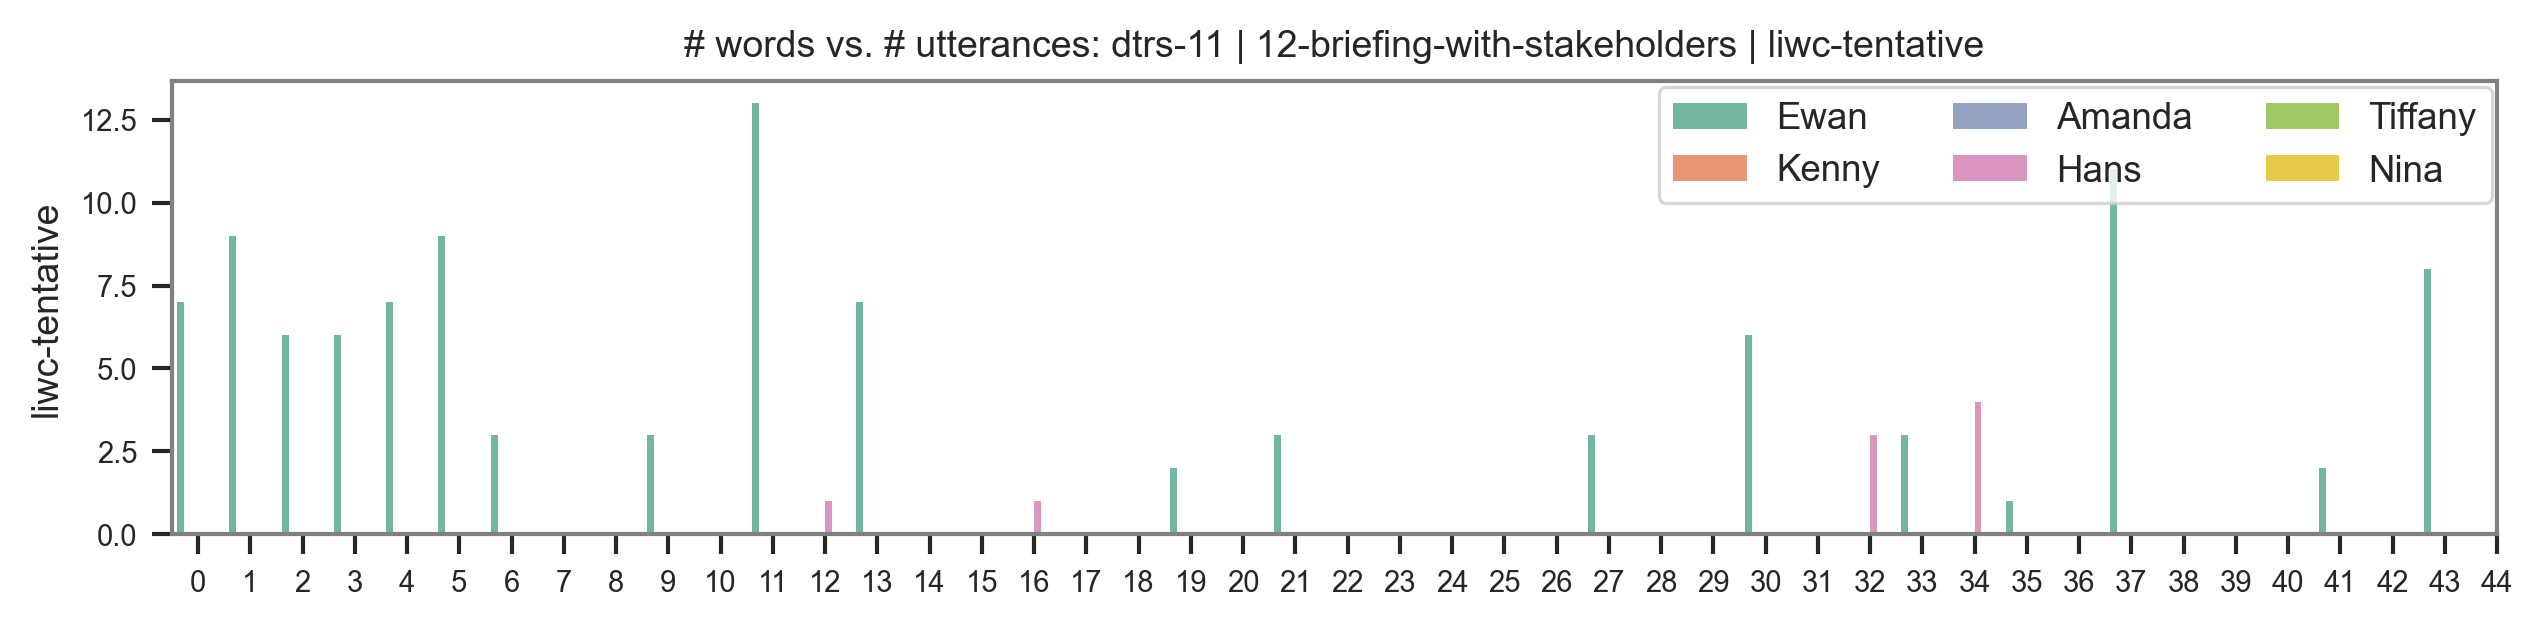

In [17]:
plot_measure(df, 'dtrs-11', '12-briefing-with-stakeholders', 'liwc-tentative')

## Examine Specifics
Examine utterances in detail and show overlaps with terms in the lexical category.

In [18]:
print_lines(df, 'dtrs-11', '12-briefing-with-stakeholders', liwc_tentative, 4, num_lines=5)

4 : Ewan


then we start on **kind of** the real stuff, which is that they will create two products that the company- **or** hero-products, one compa- one product each that the company will **kind of** push forward. that's gonna be their hero-product. and that we don't know what is yet, could be **anything**, and that is **something** that, it could be a service, could be a domestic robot, i don't know, it really doesn't matter for us what the product is, because what we'll wanna know is, how do they make decisions?, what is important to them? how do they think?, how do they discuss this?, what stories do they pull up?, what stuff do they disregard?, that's what we need and the product that they choose, **if** it's a frying pan, **or** a domestic robot, **or** eh like a food delivery service, doesn't really matter, we will remove that and input our own thing when they come back and continue this work. but then we have a really good understanding of, you know, how they get from a to b, and the decision-making process they do.

----------
5 : Ewan


ehh and we gonna have a break, eh it's gonna be **pretty** intense, so well, we need a break, then we gonna have a review of that exercise eh which, **if** you can remind me of that review together- oh sorry yeah, then eh as we move along we this, so they of course have the company profile and they have their own needs, but we have **some** modifiers that we are gonna probe into with them, so for example they made a domestic robot, and then we can ask the, you know, how can you- **or** how is safety and security represented within this product. eh and you gonna do it in a smart way, we're gonna like have like a mobile phone, **or** whatever that is gonna ring, like oh, we just got a call form our investor abroad, they really need to incorporate safety and security in your product, you need to do that now. and then they do it, and they discuss what is (to go?), what is to happen to encompass that. then we (inaudible) we can continue probing **kind of** shaking the cage a little bit, every time they have build **something**, to **kind of** force them to rethink what it is, and suddenly the product **maybe** become unattractive to them, and then we know, okay so  we know that, that we can't play on that thing, **or** we have to play this way to make it- to make it attractive.

----------
6 : Ewan


so we have all these, and **maybe** the one- the **most** interesting one is "sexy commitment", and sexy commitment, oh, is not what yu think it is (everybody's laughing)

----------
7 : Kenny


you sure?

----------
8 : Ewan


yeah. i was also disappointed (.) i was also disappointed

----------


In [19]:
rational_seed_words = ['because', 'reason', 'reasoning', 'therefore', 'if', 'logical', 'sense' ]
lexicon.create_category('rational-fiction', rational_seed_words, model="fiction", size=100)

["reason", "though", "actually", "Because", "Yet", "sense", "Obviously", "Though", "though", "honestly", "meant", "probably", "Although", "anyway", "either", "although", "understand", "fact", "Though", "If", "knowing", "Maybe", "Honestly", "However", "part", "situation", "reasons", "why", "either", "might", "yet", "other_reason", "knew", "obviously", "certainly", "yet", "cause", "idea", "anything", "necessarily", "always", "Besides", "mean", "Clearly", "thought", "suppose", "anyone", "seem", "Or", "otherwise", "reasoning", "point", "exactly", "definitely", "especially", "good_thing", "one", "anymore", "purpose", "understood", "guess", "Actually", "sure", "Yet", "surely", "truly", "whether", "Even", "kind", "Surely", "maybe", "considering", "Knowing", "extent", "logical", "person", "unless"]


In [20]:
rational_seed_words = ['because', 'reason', 'reasoning', 'therefore', 'logical', 'sense' ]
lexicon.create_category('rational-fiction', rational_seed_words, model="fiction", size=100)


["reason", "sense", "though", "Yet", "actually", "Though", "Although", "Obviously", "Because", "Though", "reasons", "meant", "fact", "reasoning", "though", "although", "understand", "honestly", "situation", "other_reason", "necessarily", "logical", "either", "yet", "understood", "idea", "However", "part", "extent", "knowing", "certainly", "Clearly", "probably", "Honestly", "obviously", "knew", "especially", "seem", "anyway", "point", "good_thing", "Yet", "whole_idea", "common_sense", "current_situation", "why", "yet", "kind", "purpose", "many_reasons", "meaning", "always", "complication", "Maybe", "actuality", "simple_fact", "truly", "appeal", "considering", "intentions", "necessity", "cause", "possibility", "exactly", "mindset", "very_reason", "potential", "main_reason", "Regardless", "regardless", "definitely", "Moreover", "Besides", "however", "Even", "thought", "motive", "true", "certain", "most_things", "pointless", "other_reasons", "telling", "understandable"]
